<a href="https://colab.research.google.com/github/dushyanth-pulaparthi/DIGIT-RECOGNITION/blob/main/DIGIT_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.9041 - loss: 0.2983 - val_accuracy: 0.9836 - val_loss: 0.0489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9862 - val_loss: 0.0394
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.9903 - loss: 0.0300 - val_accuracy: 0.9918 - val_loss: 0.0264
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9937 - loss: 0.0201 - val_accuracy: 0.9901 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9905 - val_loss: 0.0313
313/313 - 2s - 8ms/step - accuracy: 0.9905 - loss: 0.0313

Test accuracy: 0.9905
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


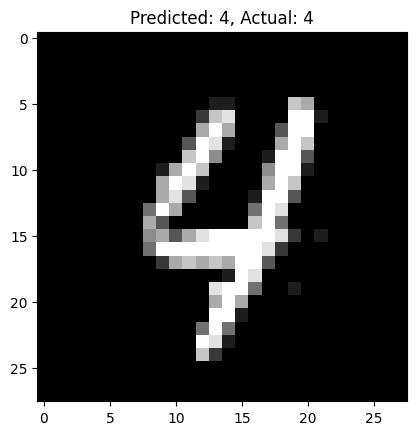

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data (scale pixel values to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Make predictions
predictions = model.predict(x_test)

# Display a test image with prediction
index = np.random.randint(0, len(x_test))  # Select a random test image
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}')
plt.show()
